# **Random Forest Regressor Model Theory**


## Theory

A random forest regressor is an ensemble learning algorithm that combines multiple decision trees to make more accurate and robust predictions for continuous output variables. The predictions are aggregated (typically using the average) from all the individual trees to produce the final result.

### Ensemble Approach

- **Bagging (Bootstrap Aggregation)**: Each tree in the random forest is trained on a random subset of the training data (with replacement). This reduces overfitting and increases model robustness.
- **Random Feature Selection**: At each split, a random subset of features is considered for splitting. This ensures diversity among the trees and further prevents overfitting.

## Model Training

The training process involves constructing multiple decision trees, each trained on a different subset of the data. Key steps include:

### Bootstrapping

The algorithm generates $T$ different bootstrap samples (random subsets with replacement) from the training dataset. Each bootstrap sample is used to train an individual decision tree.

### Random Feature Selection

At each split in a tree, instead of evaluating all features, the algorithm randomly selects a subset of features to find the best split. This ensures diversity among trees and reduces correlation between them.

### Aggregating Predictions

After training, the predictions from all the decision trees are aggregated. For regression, the final prediction is the mean of the predictions from all trees:
\[
\hat{y} = \frac{1}{T} \sum_{t=1}^T f_t(x)
\]
Where:  
- $T$ is the total number of trees.  
- $f_t(x)$ is the prediction from the $t$-th tree.  

## Splitting Criterion

Each decision tree within the random forest uses the same splitting criteria as a standard decision tree regressor. Common metrics include:

1. **Mean Squared Error (MSE)**:  
   $MSE = \frac{1}{N} \sum_{i=1}^N \left(y_i - \bar{y}\right)^2$  

   Where:  
   - $N$ is the number of samples in the split.  
   - $y_i$ is the actual target value for the $i$-th sample.  
   - $\bar{y}$ is the mean of the target values in the split.  

2. **Reduction in Variance**:  
   $Variance = \frac{1}{N} \sum_{i=1}^N \left(y_i - \bar{y}\right)^2$  

## Predictions

Once the random forest is trained, the prediction for a given input is computed by aggregating the predictions from all trees:  
1. Pass the input data through each decision tree.  
2. Collect the predictions from all trees.  
3. Compute the average of all predictions to produce the final output.

## Advantages

- **Robustness**: Reduces overfitting compared to individual decision trees.  
- **Feature Importance**: Random forests provide a measure of feature importance, which can help in feature selection.  
- **Handles Non-Linearity**: Capable of modeling complex, non-linear relationships in data.  

## Hyperparameters

Random forest regressors have several hyperparameters that control their behavior:

- **n_estimators**: The number of trees in the forest ($T$).  
- **max_depth**: Limits the depth of individual trees to prevent overfitting.  
- **min_samples_split**: Minimum number of samples required to split an internal node.  
- **min_samples_leaf**: Minimum number of samples required in a leaf node.  
- **max_features**: The number of features to consider when looking for the best split.  
- **bootstrap**: Whether to use bootstrapping (sampling with replacement).  

By carefully tuning these hyperparameters, the performance of the random forest regressor can be optimized for specific datasets.



## **Model Evaluation**


### 1. Mean Squared Error (MSE)

**Formula:**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

**Description:**
- **Mean Squared Error (MSE)** is a widely used metric for evaluating the accuracy of regression models.
- It measures the average squared difference between the predicted values ($y_{\text{pred}}$) and the actual target values ($y_{\text{true}}$).
- The squared differences are averaged across all data points in the dataset.

**Interpretation:**
- A lower MSE indicates a better fit of the model to the data, as it means the model's predictions are closer to the actual values.
- MSE is sensitive to outliers because the squared differences magnify the impact of large errors.
- **Limitations:**
  - MSE can be hard to interpret because it is in squared units of the target variable.
  - It disproportionately penalizes larger errors due to the squaring process.

---

### 2. Root Mean Squared Error (RMSE)

**Formula:**
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Description:**
- **Root Mean Squared Error (RMSE)** is a variant of MSE that provides the square root of the average squared difference between predicted and actual values.
- It is often preferred because it is in the same unit as the target variable, making it more interpretable.

**Interpretation:**
- Like MSE, a lower RMSE indicates a better fit of the model to the data.
- RMSE is also sensitive to outliers due to the square root operation.
- **Advantages over MSE:**
  - RMSE provides a more intuitive interpretation since it is in the same scale as the target variable.
  - It can be more directly compared to the values of the actual data.

---

### 3. R-squared ($R^2$)

**Formula:**
$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

**Description:**
- **R-squared ($R^2$)**, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable ($y_{\text{true}}$) that is predictable from the independent variable(s) ($y_{\text{pred}}$) in a regression model.
- It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit.

**Interpretation:**
- A higher $R^2$ value suggests that the model explains a larger proportion of the variance in the target variable.
- However, $R^2$ does not provide information about the goodness of individual predictions or whether the model is overfitting or underfitting.
- **Limitations:**
  - $R^2$ can be misleading in cases of overfitting, especially with polynomial regression models. Even if $R^2$ is high, the model may not generalize well to unseen data.
  - It doesn’t penalize for adding irrelevant predictors, so adjusted $R^2$ is often preferred for models with multiple predictors.

---

### 4. Adjusted R-squared

**Formula:**
$$
\text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \frac{n-1}{n-p-1}
$$
where \(n\) is the number of data points and \(p\) is the number of predictors.

**Description:**
- **Adjusted R-squared** adjusts the R-squared value to account for the number of predictors in the model, helping to prevent overfitting when adding more terms to the model.
- Unlike $R^2$, it can decrease if the additional predictors do not improve the model significantly.

**Interpretation:**
- A higher adjusted $R^2$ suggests that the model is not just overfitting, but has genuine explanatory power with the number of predictors taken into account.
- It is especially useful when comparing models with different numbers of predictors.

---

### 5. Mean Absolute Error (MAE)

**Formula:**
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true}_i} - y_{\text{pred}_i}|
$$

**Description:**
- **Mean Absolute Error (MAE)** measures the average of the absolute errors between the predicted and actual values.
- Unlike MSE and RMSE, MAE is not sensitive to outliers because it does not square the errors.

**Interpretation:**
- MAE provides a straightforward understanding of the average error magnitude.
- A lower MAE suggests better model accuracy, but it may not highlight the impact of large errors as much as MSE or RMSE.

## sklearn template [scikit-learn: RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

### class sklearn.ensemble.RandomForestRegressor(*, n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

| **Parameter**             | **Description**                                                                                                  | **Default**        |
|---------------------------|------------------------------------------------------------------------------------------------------------------|--------------------|
| `n_estimators`            | The number of trees in the forest. More trees generally improve performance but increase computation.            | `100`              |
| `criterion`               | The function to measure the quality of a split. Options: `"squared_error"`, `"friedman_mse"`, `"absolute_error"`, `"poisson"`. | `"squared_error"`  |
| `max_depth`               | The maximum depth of the tree. `None` means nodes are expanded until all leaves are pure or contain fewer than `min_samples_split` samples. | `None`             |
| `min_samples_split`       | The minimum number of samples required to split an internal node. Can be an `int` or a `float` (fraction of samples). | `2`                |
| `min_samples_leaf`        | The minimum number of samples required to be at a leaf node. Can be an `int` or a `float` (fraction of samples). | `1`                |
| `min_weight_fraction_leaf`| The minimum weighted fraction of the total weights required to be at a leaf node.                               | `0.0`              |
| `max_features`            | The number of features to consider when looking for the best split. Options: `int`, `float`, `"sqrt"`, `"log2"`, `None`. | `"auto"`           |
| `max_leaf_nodes`          | Maximum number of leaf nodes. `None` means unlimited.                                                           | `None`             |
| `min_impurity_decrease`   | A node will be split if this split decreases impurity by at least this value.                                    | `0.0`              |
| `bootstrap`               | Whether bootstrap samples are used when building trees. If `False`, the whole dataset is used to build each tree. | `True`             |
| `oob_score`               | Whether to use out-of-bag samples to estimate the generalization error.                                         | `False`            |
| `n_jobs`                  | The number of jobs to run in parallel for both `fit` and `predict`. `None` means 1 job, `-1` means using all processors. | `None`             |
| `random_state`            | Controls randomness of the estimator. For deterministic behavior, set an integer.                               | `None`             |
| `verbose`                 | Controls the verbosity when fitting and predicting.                                                             | `0`                |
| `warm_start`              | Whether to reuse the solution of the previous call to `fit` and add more estimators to the ensemble.            | `False`            |
| `ccp_alpha`               | Complexity parameter used for Minimal Cost-Complexity Pruning.                                                 | `0.0`              |
| `max_samples`             | The number of samples to draw from X to train each base estimator. If `None`, then draw all samples.            | `None`             |

-

| **Attribute**            | **Description**                                                                                                    |
|--------------------------|--------------------------------------------------------------------------------------------------------------------|
| `feature_importances_`   | The feature importances, based on the impurity decrease at each split.                                             |
| `oob_score_`             | The out-of-bag score to estimate the generalization accuracy.                                                      |
| `n_features_`            | The number of features used for training the model.                                                                |
| `n_outputs_`             | The number of outputs (target variables).                                                                          |
| `estimators_`            | The collection of fitted sub-estimators (decision trees).                                                          |
| `classes_`               | The class labels for classification tasks. For regression, it is `None`.                                           |
| `n_estimators_`          | The number of trees in the forest.                                                                                 |

-

| **Method**               | **Description**                                                                                                   |
|--------------------------|-------------------------------------------------------------------------------------------------------------------|
| `fit(X, y)`              | Fit the random forest to the provided data.                                                                         |
| `predict(X)`             | Predict target values for the provided data.                                                                       |
| `score(X, y)`            | Return the R^2 coefficient of determination for the prediction.                                                     |
| `apply(X)`               | Return the indices of the leaves each sample is assigned to.                                                        |
| `get_params(deep=True)`  | Get parameters for this estimator.                                                                                  |
| `set_params(**params)`   | Set the parameters of this estimator.                                                                               |


# Random Forest Regression - Example

## Data loading

In [ ]:
import pandas as pd

gold_df = pd.read_csv('/home/petar-ubuntu/Learning/ML_Theory/ML_Models/Random_Forest_Regressor/data/gld_price_data.csv')

gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


##  Data processing

In [8]:
# calculate statistical measures of the data_set
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_df_without_date = gold_df.drop(['Date'], axis=1)

X = gold_df.drop(['Date','GLD'],axis=1)
y = gold_df['GLD']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Plotting data

<Axes: >

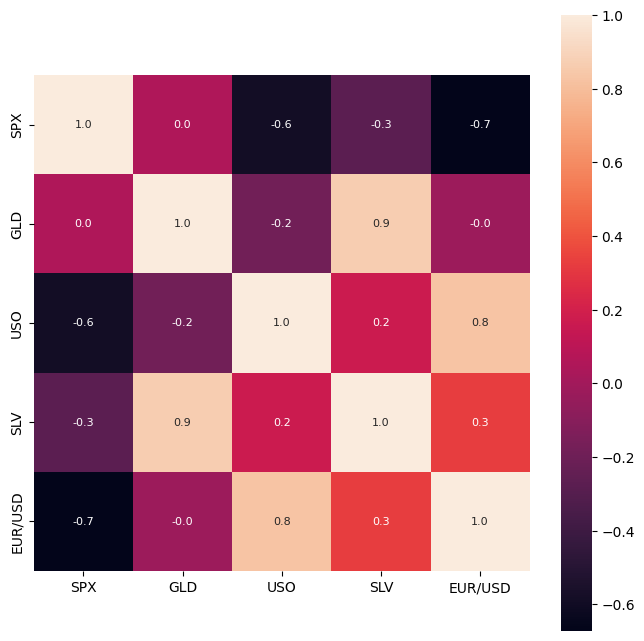

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = gold_df_without_date.corr()

# build a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})

## Model definition

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train,y_train)

# prediction on Test Data
y_pred = rf_regressor.predict(X_test)

## Model evaulation

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 5.222812763196402
Root Mean Squared Error (RMSE): 2.285347405362345
Mean Absolute Error (MAE): 1.253820046877733
R-squared (R2): 0.9904745326335417
